<a href="https://colab.research.google.com/github/ChristoSyril/USED-CAR-PRICE-PREDICTION-MACHINE-LEARNING-MODEL/blob/main/USED_CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded file
data = pd.read_csv('cardekho_dataset.csv')

# Show first 5 rows of the dataset
data.head()


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
# Drop unnecessary columns
data = data.drop(['car_name'], axis=1)

# Show remaining columns
print(data.columns)



Index(['Unnamed: 0', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')


In [ ]:
# Drop the 'Unnamed: 0' column (unnecessary index column)
data = data.drop(['Unnamed: 0'], axis=1)

# Show the updated columns
print(data.columns)


Index(['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')


In [ ]:
# Check for missing values in each column
print(data.isnull().sum())


brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [ ]:
# Convert categorical columns into numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Show the new shape of the dataset (rows, columns)
print(data.shape)

# Show first 5 rows to see the changes
data.head()


(15411, 164)


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,brand_BMW,brand_Bentley,brand_Datsun,...,model_i10,model_i20,model_redi-GO,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
1,5,20000,18.90,1197,82.00,5,550000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
2,11,60000,17.00,1197,80.00,5,215000,False,False,False,...,False,True,False,True,False,False,False,False,True,True
3,9,37000,20.92,998,67.10,5,226000,False,False,False,...,False,False,False,True,False,False,False,False,True,True
4,6,30000,22.77,1498,98.59,5,570000,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
# Select features (X) by dropping the 'selling_price' column
X = data.drop('selling_price', axis=1)

# Select the target (y)
y = data['selling_price']

# Print the shapes to confirm they are correct
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (15411, 163)
Target shape: (15411,)


In [ ]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# This part is the same as before - split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
# n_estimators=100 means the model will use 100 decision trees
# random_state=42 ensures you get the same results every time you run it
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the new model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
predictions_rf = model_rf.predict(X_test)

# Evaluate the model's performance and print the result
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 46022193161.10144


In [ ]:
# Import the necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the Random Forest Regressor model
# n_estimators=100 means the model uses 100 decision trees
# random_state=42 ensures you get the same result every time
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data and store them in the 'predictions_rf' variable
predictions_rf = model_rf.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 46022193161.10144


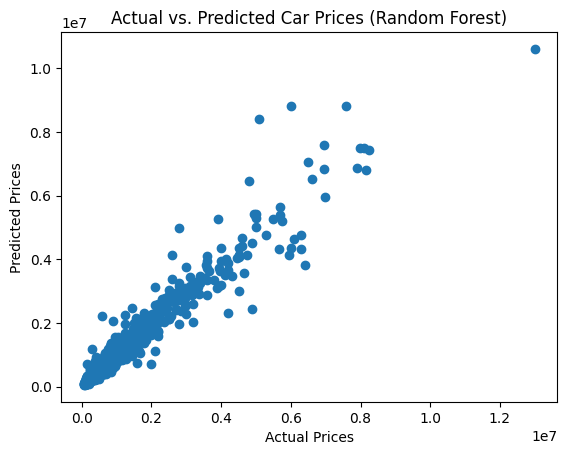

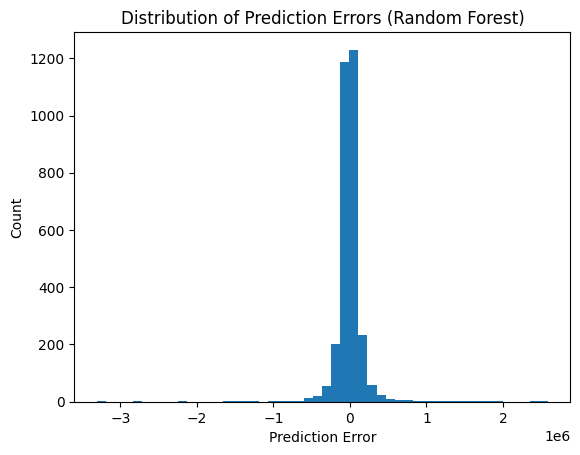

In [ ]:
# Import the necessary plotting library
import matplotlib.pyplot as plt

# Create a scatter plot of true prices vs. predicted prices
# This plot helps you see how close your predictions are to the actual prices.
# A perfect model would have all points on a straight diagonal line.
plt.scatter(y_test, predictions_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices (Random Forest)")
plt.show()

# Create a second plot of the residuals (errors)
# This histogram shows the distribution of your model's prediction errors.
# Ideally, it should look like a bell curve centered around zero, meaning the model's
# errors are small and equally distributed.
plt.figure()
plt.hist(y_test - predictions_rf, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors (Random Forest)")
plt.show()


In [ ]:
from joblib import dump

# Save the trained Random Forest model to a file
dump(model_rf, 'car_price_predictor.joblib')

print("Model saved as 'car_price_predictor.joblib'")

Model saved as 'car_price_predictor.joblib'
